In [1]:
import numpy as np
%run tools.py
import pandas as pd
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib
import dask.array as da

In [2]:
metadata = pd.read_csv("../../config/metadata.tsv", sep="\t")

In [3]:
contig = '2L'

# Load Arrays
snps, pos = loadZarrArrays(genotypePath=f"../../resources/snp_genotypes/all/1244-VO-GH-YAWSON-VMF00149/{contig}/calldata/GT/", 
                                        positionsPath=f"../../resources/snp_genotypes/all/sites/{contig}/variants/POS/",
                                        siteFilterPath=None)
        
ac_cohort = snps.count_alleles(max_allele=3).compute()
# N.B., if going to use to_n_alt later, need to make sure sites are 
# biallelic and one of the alleles is the reference allele
ref_ac = ac_cohort[:, 0]
loc_sites = ac_cohort.is_biallelic() & (ref_ac > 0)
gt_seg = da.compress(loc_sites, snps, axis=0)
pos_seg = da.compress(loc_sites, pos, axis=0)

/home/sanj/apps/anaconda3/lib/python3.7/site-packages/dask/array/core.py:3219: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


In [ ]:
gn_alt = allel.GenotypeDaskArray(gt_seg).to_n_alt()

In [ ]:
indices = np.random.choice(gn_alt.shape[0], 10000, replace=False)

In [ ]:
indices = np.sort(indices)

In [11]:
random_gn_alt = gn_alt.compute()

In [ ]:
scaled_gaardian = StandardScaler().fit_transform(gn_alt.T)

Text(0.5, 1.0, 'UMAP - Gaardian')

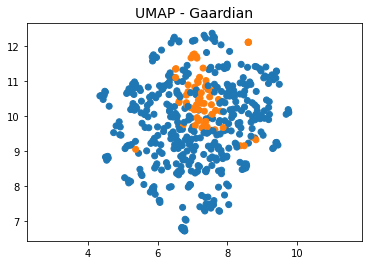

In [22]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_gaardian)
embedding.shape
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in metadata.species_gambiae_coluzzii.map({"coluzzii":0, "gambiae":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP - Gaardian', fontsize=14)